<a href="https://colab.research.google.com/github/joshbrx/biomath_model/blob/main/Voronoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polígonos de Voronoi

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random 
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.collections import LineCollection

from matplotlib.patches import Polygon

mpl.rcParams['figure.figsize'] = (14,8)

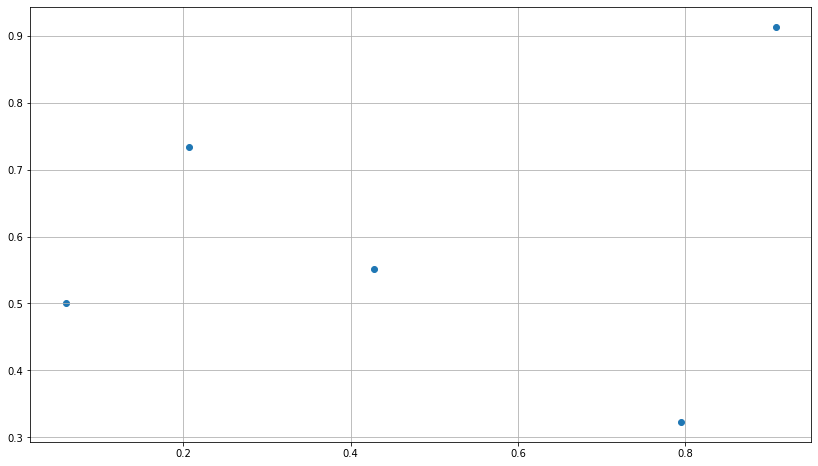

In [2]:
puntos = np.random.rand(5,2)        
plt.scatter(puntos[:,0], puntos[:,1])
plt.grid()

In [3]:
### Create Voronoi object
vor = Voronoi(puntos)

In [4]:
### Get Voronoi vertices
vor_vertices = vor.vertices
print(vor_vertices.shape)

(4, 2)


In [5]:
### Get Voronoi regions
vor_regions = vor.regions
print(vor_regions)

[[1, -1, 0], [-1, 3, 2], [3, 1, 0, 2], [-1, 0, 2], [-1, 1, 3], []]


<Figure size 504x504 with 0 Axes>

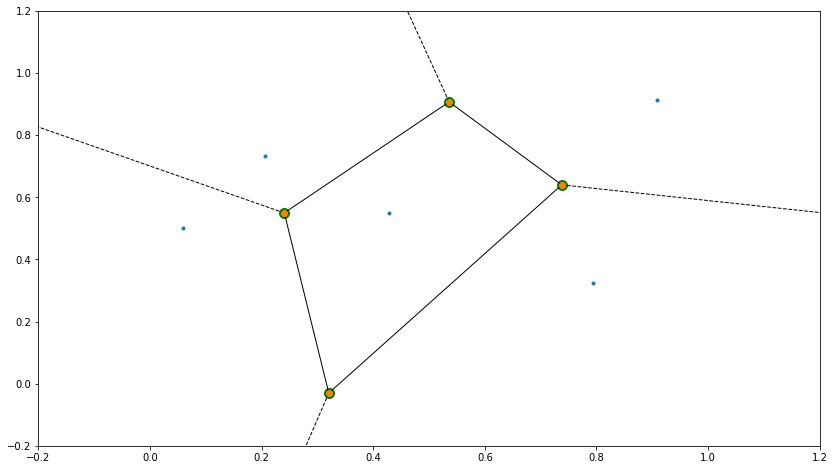

In [6]:
### Use built-in function to plot 
plt.figure(figsize=(7,7))
voronoi_plot_2d(vor)
plt.scatter(vor_vertices[:,0], vor_vertices[:,1], color="green", s=100)
plt.xlim([-0.2,1.2]); plt.ylim([-0.2,1.2])
plt.show()

In [7]:
### Get Voronoi ridge-vertices and ridge-points
print(vor.ridge_vertices)
print(vor.ridge_points)

[[-1, 0], [-1, 1], [0, 1], [2, 3], [-1, 2], [-1, 3], [0, 2], [1, 3]]
[[3 2]
 [3 4]
 [3 1]
 [0 1]
 [0 2]
 [0 4]
 [1 2]
 [1 4]]


Ahora continuamos al definir las fronteras de nuestra superficie. Como queremos que se asemeje a una estructura acinar, simulamos un medio círculo interior y exterior.

\begin{align}
    \alpha(r, \theta) = r,\qquad\ \theta\in{\{0, \pi\}},\quad  r=\{1, 2\}
\end{align}

\begin{align}
    x &= r\cos\theta,\quad &y &= r\sin\theta\\
    \Rightarrow r &= \sqrt{x^2+y^2},\quad &\theta &= \arctan\left(\frac{y}{x}\right)
\end{align}

In [8]:
### parámetros
tol = 0.001; n_space = 200
theta = np.linspace(tol, np.pi-tol, n_space);
r = np.array([1.0 + tol, 2.0 - tol]);

### funciones
alpha_x = lambda r, theta: r*np.cos(theta);
alpha_y = lambda r, theta: r*np.sin(theta);

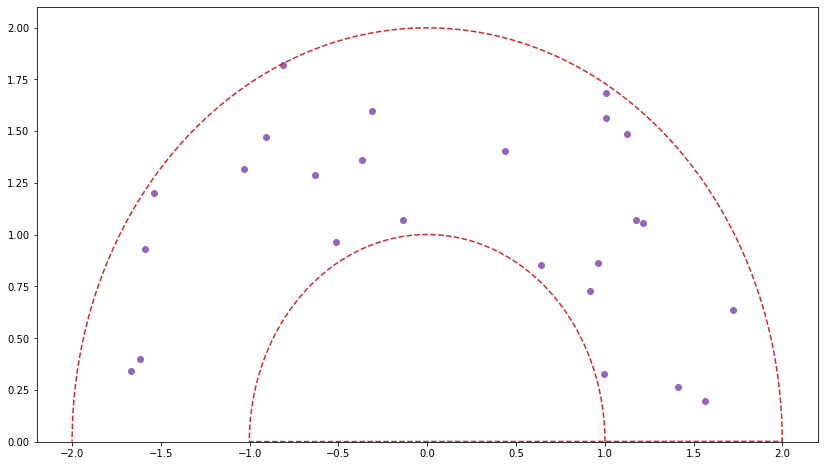

In [9]:
N = 25;
X_border, Y_border = [], []
for i in range(len(r)):
    X_border.append(alpha_x(r[i], theta))
    Y_border.append(alpha_y(r[i], theta))

X_border = np.array(X_border).flatten()
Y_border = np.array(Y_border).flatten()
pts_border = np.array([X_border, Y_border]).T

#----------------------------------------
r_rand     = np.random.rand(N) * abs(r[-1]-r[0]) + r[0]
theta_rand = np.random.rand(N) * abs(theta[-1]-theta[0]) + theta[0]

X_rand = alpha_x(r_rand, theta_rand)
Y_rand = alpha_y(r_rand, theta_rand)
pts_rand = np.array([X_rand, Y_rand]).T

#----------------------------------------
X_base = np.linspace(-r[1], r[1], n_space).flatten()
Y_base = np.zeros(n_space).flatten()-0.1
pts_base = np.array([X_base, Y_base]).T

#----------------------------------------

plt.scatter(X_rand, Y_rand, color="tab:purple")
plt.plot(X_border, Y_border, "--", color="tab:red");
plt.plot(X_base, Y_base, "--", color="tab:red"); 
plt.ylim([0.0,2.1]); plt.show()

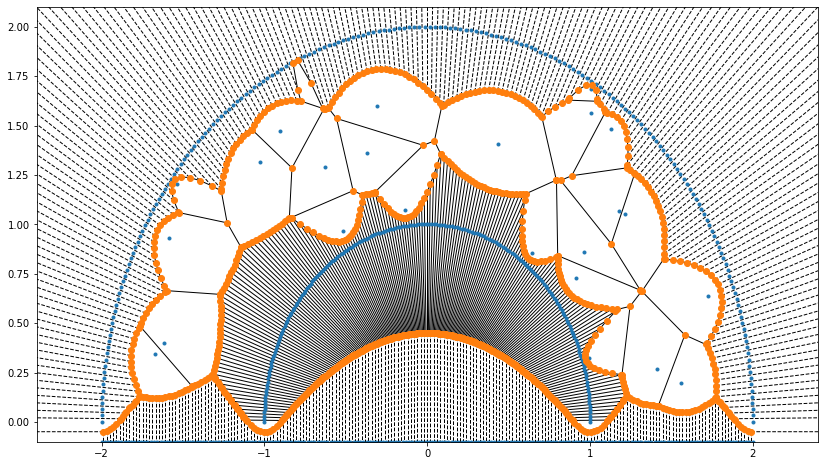

<Figure size 1080x504 with 0 Axes>

In [10]:
total = np.concatenate((pts_border, pts_rand, pts_base))
vor = Voronoi(total)
vor_vertices = vor.vertices
vor_regions = vor.regions

voronoi_plot_2d(vor)
plt.ylim([-0.1,2.1])
plt.figure(figsize=(15,7))
plt.show()

(-0.1, 2.0)

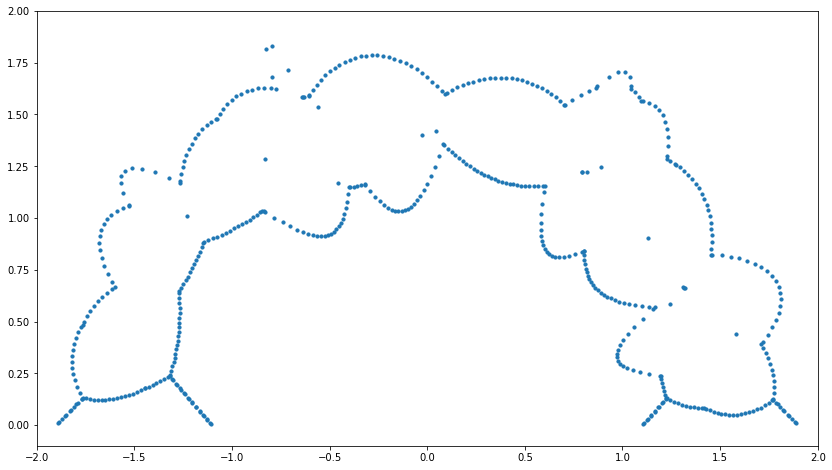

In [11]:
vor_vertices = vor_vertices[np.where(vor_vertices[:,1] >= 0)]
vor_vertices = vor_vertices[np.where(np.sqrt(vor_vertices[:,1]**2+vor_vertices[:,0]**2) >=r[0])]
vor_vertices = vor_vertices[np.where(np.sqrt(vor_vertices[:,1]**2+vor_vertices[:,0]**2) <=r[1])]
# hull = ConvexHull(vor_vertices)
plt.scatter(vor_vertices[:,0], vor_vertices[:,1], s=10)
plt.xlim([-2,2]); plt.ylim([-0.1,2])

*   ###  __Paso $N+1$:__ _Encontrando y discriminando las regiones de Voronoi_



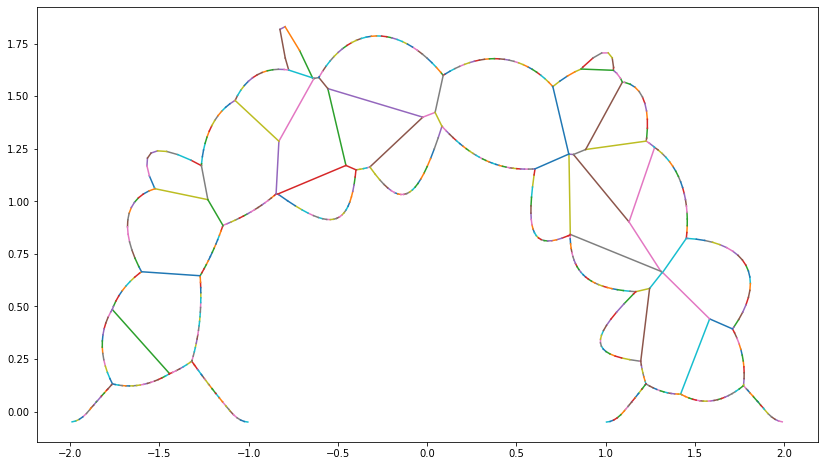

In [12]:
# fig,ax = plt.subplots();

finite_segments = []
for pointidx, simplex in zip(vor.ridge_points, vor.ridge_vertices):
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):
        finite_segments.append(vor.vertices[simplex])

for i in range(len(finite_segments)):
    x_line = finite_segments[i][:,0]
    y_line = finite_segments[i][:,1]
    r_line = (x_line**2 + y_line**2)**(1/2)
    if (np.min(r_line)>= r[0]-tol) and (np.max(r_line)<= r[1]+tol) and (np.min(y_line) >= -0.15):
        plt.plot(x_line, y_line)

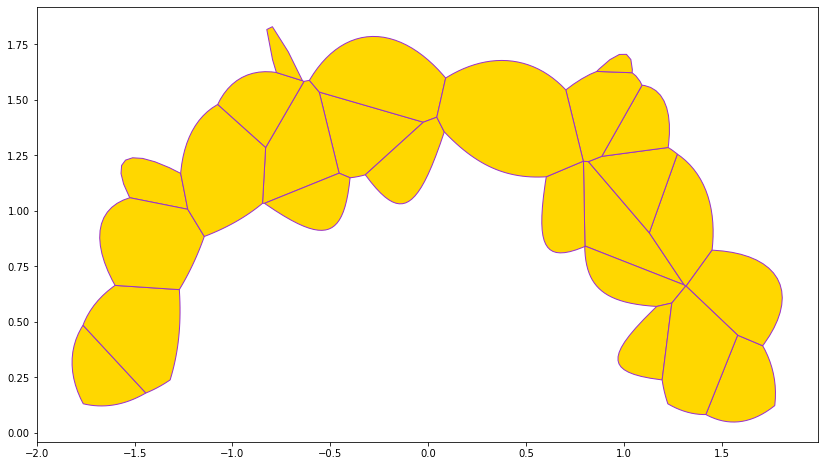

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

### make up data points
points = np.random.rand(15,2)

### compute Voronoi tesselation
vor = Voronoi(total)

### colorize
Polygons = []
for i in range(len(vor.regions)):
    if (not -1 in vor.regions[i]) and (len(vor.regions[i]) >=1):
        x_ = np.array([vor.vertices[k][0] for k in vor.regions[i]])
        y_ = np.array([vor.vertices[k][1] for k in vor.regions[i]])
        r_ = (x_**2+y_**2)**(1/2)
        if (np.min(r_) >= r[0] - tol) and (np.max(r_) <= r[1] + tol):
            polygon = np.array([vor.vertices[k] for k in vor.regions[i]])
            plt.fill(*zip(*polygon), edgecolor="darkorchid", facecolor="gold")
            Polygons.append(np.array([*zip(*polygon)]))

plt.show()

In [38]:
len(Polygons)           # Número de polígonos guardados (coincide con el número de puntos dados)
# x[i] -> Polygons[i][0]
# y[i] -> Polygons[i][1]

25


*   ###  __Paso $N+2$:__ _Calculando el área y el centroide de un polígono_

\begin{align}
    A &= \frac{1}{2}\sum_{i=0}^{N-1} (x_iy_{i+1}-x_{i+1}y_i)
\end{align}

Y para el cálculo de las coordenadas del centro de masas en 2D tenemos las siguientes ecuaciones

\begin{align}
    C_x &= \frac{1}{6A}\sum_{i=0}^{N-1}(x_i+x_{i+1})(x_iy_{i+1}-x_{i+1}y_i) \\
    C_y &= \frac{1}{6A}\sum_{i=0}^{N-1}(y_i+y_{i+1})(x_iy_{i+1}-x_{i+1}y_i)
\end{align}

Para mayor información puede consultar el siguiente enlace: [Calculating the area and centroid of a polygon. By Paul Bourke](https://lexrent.eu/wp-content/uploads/torza/artikel_groep_sub_2_docs/BYZ_3_Polygon-Area-and-Centroid.pdf)

-----

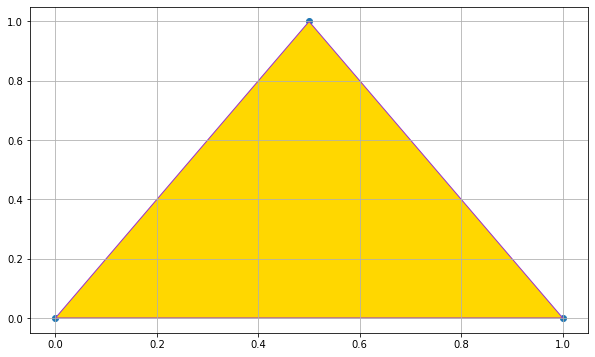

In [61]:
x_prueba = np.array([0,1,0.5])
y_prueba = np.array([0,0,1])

polygon_prueba = np.array([x_prueba, y_prueba])

plt.figure(figsize=(10,6))
plt.scatter(x_prueba, y_prueba); plt.fill(x_prueba, y_prueba, edgecolor="darkorchid", facecolor="gold")
plt.grid()

In [40]:
# len(Polygons)                   #50
# np.matrix(Polygons[0]).shape    #(2, 5)
Polygons[0].shape[1]

5

In [41]:
Polygons[0][1]

array([1.22384522, 1.22227658, 0.90153687, 0.66674196, 0.8421878 ])

In [42]:
def get_area(polygon):
    n_area = polygon.shape[1]
    X, Y = polygon
    S = np.empty(n_area)
    
    for i in range(n_area):
        S[i] = X [i]*Y[(i+1) % n_area] - X[(i+1) % n_area]*Y[i]
    return abs((1/2)*np.sum(S))

get_area(polygon_prueba)

0.5

In [43]:
def area_voronoi(Polygons):
    S = np.empty(len(Polygons))

    for i in range(len(S)):
        S[i] = get_area(Polygons[i])
    return S

area_voronoi(Polygons)

array([0.11073795, 0.11715156, 0.08847469, 0.06507459, 0.09717892,
       0.1085828 , 0.00997408, 0.07616833, 0.0543928 , 0.12865938,
       0.08431375, 0.01815878, 0.17624648, 0.09228871, 0.13280433,
       0.16502586, 0.17250924, 0.18057649, 0.08038678, 0.07329383,
       0.07612994, 0.05920481, 0.2919316 , 0.06474387, 0.14420869])

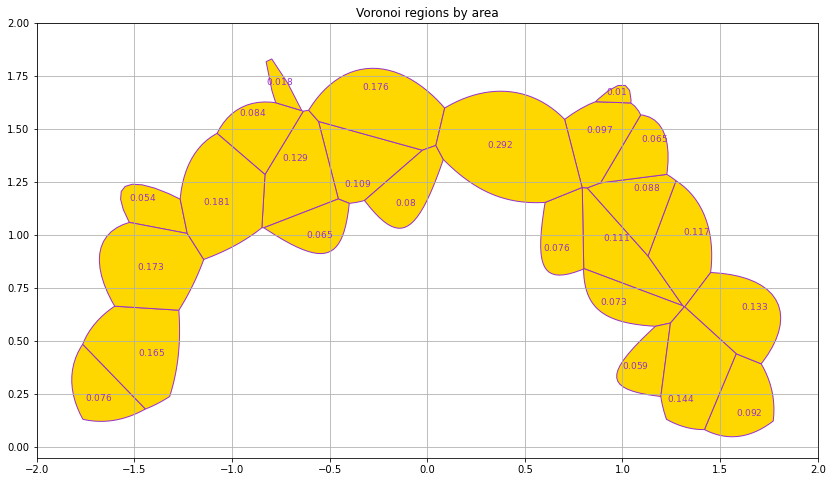

In [63]:
A_vor = area_voronoi(Polygons)

for i in range(len(Polygons)):
    X, Y = Polygons[i]
    num_label = round(A_vor[i], 3)
    plt.text(np.mean(X), np.mean(Y), f'${num_label}$', fontsize=9, horizontalalignment='center', color='darkorchid', fontweight='bold')
    plt.fill(X, Y, edgecolor="darkorchid", facecolor="gold")

plt.title("Voronoi regions by area")
plt.xlim([-2.0, 2.0]); plt.ylim([-0.05, 2.0])
plt.grid()

---

Ahora se calcula el centroide de cada polígono

In [52]:
def get_centroid(polygon, tol = 0.05):
    n_centroid = polygon.shape[1]
    X, Y = polygon
    CX, CY = np.empty([2, n_centroid])
    A = get_area(polygon)
    
    for i in range(n_centroid):
        CX[i] = (X[i] + X[(i+1) % n_centroid]) * (X[i] * Y[(i+1) % n_centroid] - X[(i+1) % n_centroid]*Y[i])
        CY[i] = (Y[i] + Y[(i+1) % n_centroid]) * (X[i] * Y[(i+1) % n_centroid] - X[(i+1) % n_centroid]*Y[i])
     
    cX, cY = (np.sum(CX), np.sum(CY))/(6*A) 
    if abs(cX - np.mean(X)) > abs(-cX - np.mean(X)):
        cX = -cX
    if abs(cY - np.mean(Y)) > abs(-cY - np.mean(Y)):
        cY = -cY
    return cX, cY

get_centroid(polygon_prueba)

(0.5, 0.3333333333333333)

In [53]:
def centroid_voronoi(Polygons):
    C = np.empty([2, len(Polygons)])
    for i in range(C.shape[1]):
        C[:,i] = get_centroid(Polygons[i])
    return C

centroid_voronoi(Polygons)

array([[ 0.97710228,  1.30907949,  1.0746091 ,  1.09470932,  0.88178413,
        -0.333514  ,  0.97109711, -1.67484656, -1.40435104, -0.65809269,
        -0.85655072, -0.74844996, -0.23236743,  1.61643626,  1.59298014,
        -1.47721838, -1.42516487, -1.05353867, -0.10195047,  1.03251974,
         0.69715275,  1.12208832,  0.42174043, -0.57506973,  1.36309859],
       [ 0.91988741,  0.95173975,  1.14145298,  1.38517832,  1.4610244 ,
         1.34674764,  1.65799767,  0.2639069 ,  1.12679647,  1.28575466,
         1.48923284,  1.69596949,  1.59973432,  0.2179249 ,  0.62733918,
         0.4577371 ,  0.85011417,  1.17607172,  1.21263776,  0.68398919,
         1.00340173,  0.39478594,  1.41633093,  1.0343685 ,  0.35595647]])

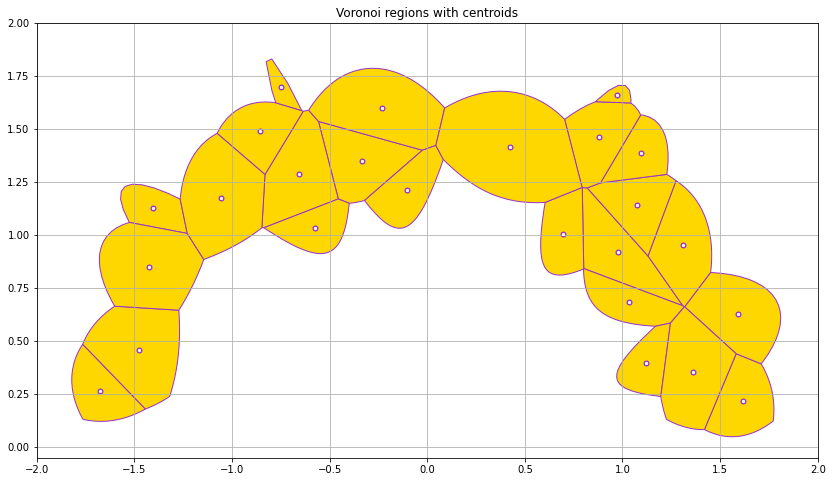

In [64]:
C_vor = centroid_voronoi(Polygons);

fig, ax = plt.subplots();

for i in range(len(Polygons)):
    X, Y = Polygons[i]
    num_label = round(get_area(Polygons[i]), 3)
    # plt.text(np.mean(X), np.mean(Y), f'${num_label}$', fontsize=8, horizontalalignment='center', color='black', fontweight='bold')
    ax.fill(X, Y, zorder=-2, edgecolor="darkorchid", facecolor="gold")
ax.scatter(C_vor[0], C_vor[1], color="darkorchid", zorder=1, s=25)
ax.scatter(C_vor[0], C_vor[1], color="azure", zorder=2, s=5)

plt.title("Voronoi regions with centroids")
plt.xlim([-2.0, 2.0]); plt.ylim([-0.05, 2.0])
plt.grid()

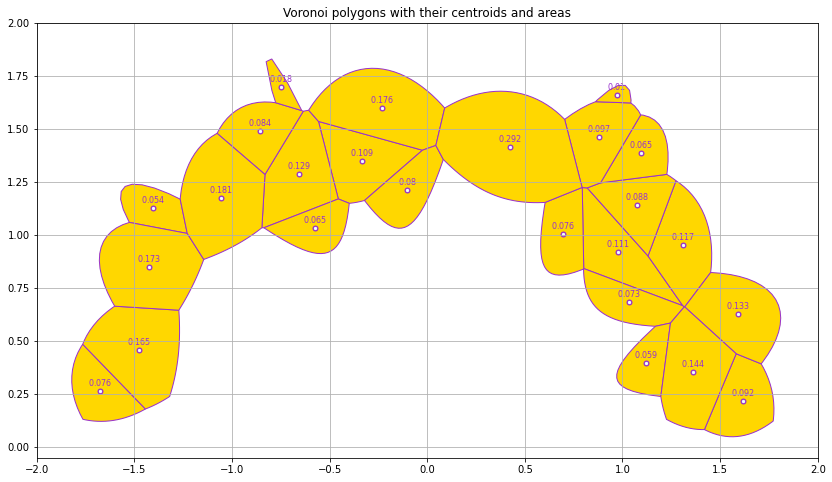

In [66]:
A_vor = area_voronoi(Polygons);
C_vor = centroid_voronoi(Polygons);

fig, ax = plt.subplots();

for i in range(len(Polygons)):
    X, Y = Polygons[i]
    num_label = round(A_vor[i], 3)
    ax.text(C_vor[0,i], C_vor[1,i]+0.025, f'${num_label}$', fontsize=8, horizontalalignment='center', color='darkorchid', fontweight='bold', zorder=1)
    ax.fill(X, Y, zorder=-2, edgecolor="darkorchid", facecolor="gold")

ax.scatter(C_vor[0], C_vor[1], color="darkorchid", zorder=-1, s=25); ax.scatter(C_vor[0], C_vor[1], color="azure", zorder=0, s=5)
ax.set_title("Voronoi polygons with their centroids and areas")
ax.set_xlim([-2.0, 2.0]); ax.set_ylim([-0.05, 2.0])
ax.grid()

*   ###  __Paso $N+3$:__ _Definiendo las interacciones y evolución del sistema a partir del potencial $V(\vec{x},t)$_

\begin{align}
    V(\vec{r_i}, t) = \frac{K_v}{2}\left(A_i(t)-A_0(t)\right)^2 + \frac{K_c}{2}\big|\vec{r}_i(t) - \vec{r}_{0,i}(t)\big|^2 
\end{align}

donde $A_0 = \sum_{i=1}^N(A_i/N)$

[Cell Patterns Emerge from Coupled Chemical and Physical Fields with Cell Proliferation Dynamics: The Arabidopsis thaliana Root as a Study System](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3642054/)

\begin{align}
    A_{1/2,dona} &= \frac{\pi}{2} \left(r_{max}^2-r_{min}^2\right)\\
    \Rightarrow A_0 &= \lim_{t\to\infty} A_i(t)=\frac{A_{1/2,dona}}{N_{reg}} = \frac{\pi}{2N} \left(r_{max}^2-r_{min}^2\right)
\end{align}

In [25]:
A_dona = (np.pi/2)*(r[1]**2 - r[0]**2)
A_0 = A_dona/len(Polygons)
A_0

0.18811856809695687

In [26]:
K_v, K_c = 1, 1

# (K_v/2)*(A_vor-A_0)**2                # evolución estática
(K_v/2)*(A_vor-np.mean(A_vor))**2    # evolución dinámica

array([8.03691156e-06, 5.43176473e-05, 1.66605013e-04, 8.67533654e-04,
       4.55993918e-05, 1.71877951e-06, 4.68073072e-03, 4.66968900e-04,
       1.36952505e-03, 2.40476589e-04, 2.51215666e-04, 3.92231820e-03,
       2.41635849e-03, 1.04257059e-04, 3.39968479e-04, 1.69927795e-03,
       2.16353764e-03, 2.72674611e-03, 3.46949154e-04, 5.58946224e-04,
       4.68142932e-04, 1.12926171e-03, 1.71500517e-02, 8.81364206e-04,
       7.02373555e-04])

In [27]:
def dist_vor(pts_vor, C_vor):
    dist, index = [], []
    for i in range(len(pts_vor)):
        s = pts_rand[i].reshape([2,1])
        dist.append(np.min(np.sum((C_vor - s)**2, axis=0)))
        index.append(np.argmin(np.sum((C_vor - s)**2, axis=0)))

    return np.array(dist), np.array(index), 

dist_vor(pts_rand, C_vor)[1]

array([ 1,  7, 11,  8, 10, 19,  0,  2,  5,  6, 21,  3,  9, 14,  7, 20, 16,
       12, 24, 22, 23, 18,  6, 17, 13])

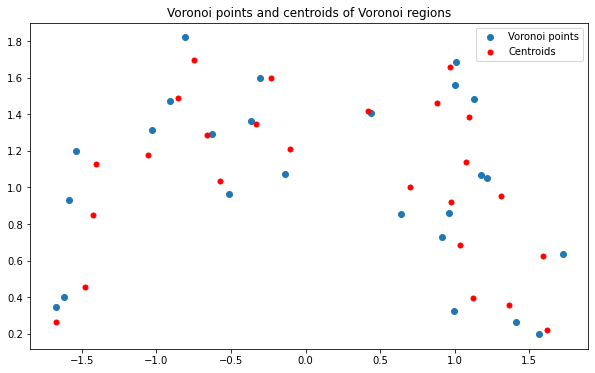

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(pts_rand.T[0],pts_rand.T[1], label="Voronoi points")
plt.scatter(C_vor[0], C_vor[1], color="red", s=25, label="Centroids")
plt.title("Voronoi points and centroids of Voronoi regions"); plt.legend()

In [29]:
K, A_0 = [1, 1], (np.pi/2)*(r[1]**2 - r[0]**2)/len(Polygons)

def potential_vor(K, pts_vor, A_vor, C_vor):
    V = np.empty(len(pts_vor))
    dist, index = dist_vor(pts_vor, C_vor)

    # v1 = ((K[0]/2)*(A_vor-A_0)**2)[index]               # evolución estática
    v1 = ((K[0]/2)*(A_vor-np.mean(A_vor))**2)[index]
    v2 = (K[1]/2)*dist
    return v1 + v2

potential_vor(K, pts_rand, A_vor, C_vor)

array([0.00972889, 0.01118643, 0.01351868, 0.01330806, 0.00160239,
       0.00846086, 0.00186801, 0.00786782, 0.00071886, 0.00973477,
       0.01154127, 0.0063011 , 0.00066637, 0.00901545, 0.00366353,
       0.01303239, 0.01852826, 0.00528733, 0.00601072, 0.01733317,
       0.00501994, 0.01066628, 0.00573247, 0.01273934, 0.00178984])

In [30]:
# potential_vor(K, pts_rand, A_vor, C_vor)*1000
np.sqrt(potential_vor(K, pts_rand, A_vor, C_vor)*1000)

array([3.11911639, 3.34461208, 3.67677549, 3.64802137, 1.26585556,
       2.9087562 , 1.36675003, 2.80496265, 0.84785436, 3.12005927,
       3.39724493, 2.51019936, 0.81631253, 3.00257367, 1.91403543,
       3.61004064, 4.30444618, 2.29941875, 2.45167605, 4.16331208,
       2.24052305, 3.26592723, 2.3942572 , 3.5692212 , 1.3378478 ])

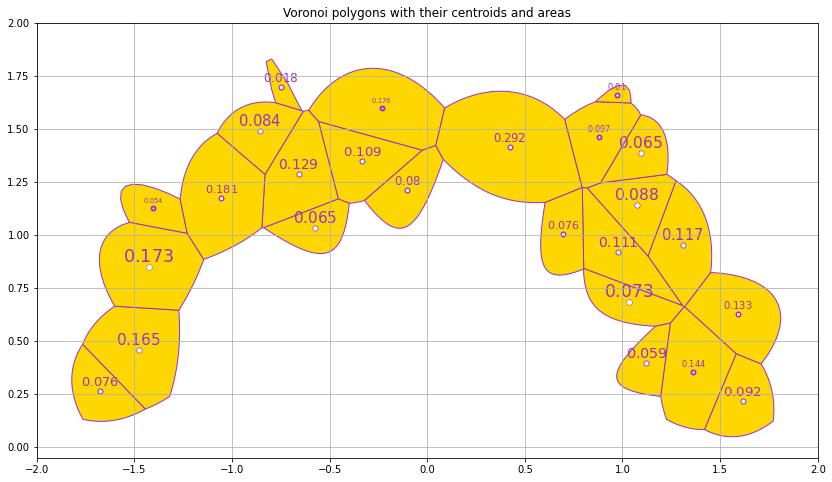

In [67]:
V_vor = potential_vor(K, pts_rand, A_vor, C_vor)
fig, ax = plt.subplots();

for i in range(len(Polygons)):
    X, Y = Polygons[i]
    num_label = round(A_vor[i], 3)
    ax.text(C_vor[0,i], C_vor[1,i]+0.025, f'${num_label}$', fontsize=np.sqrt(V_vor[i])*100+4, horizontalalignment='center', color='darkorchid', fontweight='bold', zorder=1)
    ax.fill(X, Y, zorder=-2, edgecolor="darkorchid", facecolor="gold")
    ax.scatter(C_vor[0,i], C_vor[1,i], color="azure", zorder=0, s=V_vor[i]*1000)

ax.scatter(C_vor[0], C_vor[1], color="darkorchid", zorder=-1, s=25); 
ax.set_title("Voronoi polygons with their centroids and areas")
ax.set_xlim([-2.0, 2.0]); ax.set_ylim([-0.05, 2.0])
ax.grid()

\begin{align}
    F_x(x_i, t) = &-\frac{K_v}{2}\left[\frac{1}{2}\sum_{m=1}^{M} \frac{(x_i-x_m)\cdot l_{i,m}}{|\vec{r}_i-\vec{r}_m|}\{A_i - A_0\}\right]\\
                  &- K_c(x_i-x_{0,i})\\
    F_y(y_i, t) = &-\frac{K_v}{2}\left[\frac{1}{2}\sum_{m=1}^{M} \frac{(y_i-y_m)\cdot l_{i,m}}{|\vec{r}_i-\vec{r}_m|}\{A_i - A_0\}\right]\\
                  &- K_c(y_i-y_{0,i})  
\end{align}